In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import qeds
qeds.themes.mpl_style();
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.remove('#fec630')
sns.set_style('whitegrid')

In [3]:
df_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt91.xlsx',sheet_name='Legend')
df_legend.dropna(inplace=True)
df_legend = dict(zip(df_legend['Variable name'],df_legend['Variable definition']))

In [4]:
df_legend

{'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'currency_unit': 'Currency unit',
 'year': 'Year',
 'rgdpe': 'Expenditure-side real GDP at chained PPPs (in mil. 2011US$)',
 'rgdpo': 'Output-side real GDP at chained PPPs (in mil. 2011US$)',
 'pop': 'Population (in millions)',
 'emp': 'Number of persons engaged (in millions)',
 'avh': 'Average annual hours worked by persons engaged',
 'hc': 'Human capital index, based on years of schooling and returns to education; see Human capital in PWT9.',
 'ccon': 'Real consumption of households and government, at current PPPs (in mil. 2011US$)',
 'cda': 'Real domestic absorption, (real consumption plus investment), at current PPPs (in mil. 2011US$)',
 'cgdpe': 'Expenditure-side real GDP at current PPPs (in mil. 2011US$)',
 'cgdpo': 'Output-side real GDP at current PPPs (in mil. 2011US$)',
 'cn': 'Capital stock at current PPPs (in mil. 2011US$)',
 'ck': 'Capital services levels at current PPPs (USA=1)',
 'ctfp': 'TFP level 

In [5]:
df = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt91.xlsx',sheet_name='Data')

In [6]:
df.year.unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [7]:
df_fundamentals = (df[df.year.isin(np.arange(1970,2018))]
                   .groupby(['countrycode','country'])['csh_i'].mean().reset_index().rename(columns={'csh_i':'Investment rate'}))

In [8]:
df.sort_values(['countrycode','year'],inplace=True)

In [9]:
df_emp_growth = (df[df.year.isin([1970,2017])]
                 .groupby(['countrycode']).apply(lambda x: (x['emp'].values[1]/x['emp'].values[0])**(1/47)-1)
                 .reset_index().rename(columns={0:'Employment growth'}))

In [10]:
df_fundamentals= df_fundamentals.merge(df_emp_growth,on=['countrycode'],how='left')

In [11]:
df['gdpPerworker'] = df['rgdpna']/df['emp']/1.0e6*1000
df['capPerworker'] = df['rnna']/df['emp']/1.0e6*1000

In [12]:
df_fundamentals = df_fundamentals.merge(df[df.year == 2017][['emp','countrycode','gdpPerworker','hc']],on='countrycode',how='left')

In [13]:
usa = df_fundamentals.query("countrycode=='USA'")

In [14]:
df_fundamentals['Investment rate, USA'] = usa['Investment rate'].values[0]
df_fundamentals['Employment growth, USA'] = usa['Employment growth'].values[0]
df_fundamentals['hc, USA'] = usa['hc'].values[0]
df_fundamentals['gdpPerworker, USA'] = usa['gdpPerworker'].values[0]

In [15]:
df_fundamentals.head()

,countrycode,country,Investment rate,Employment growth,emp,gdpPerworker,hc,"Investment rate, USA","Employment growth, USA","hc, USA","gdpPerworker, USA"
0,ABW,Aruba,0.434493,NaN,0.050298,73.968683,NaN,0.249809,0.012855,3.738714,114.681633
1,AGO,Angola,0.370955,0.032500,15.389316,13.137326,1.467321,0.249809,0.012855,3.738714,114.681633
2,AIA,Anguilla,0.590006,NaN,NaN,NaN,NaN,0.249809,0.012855,3.738714,114.681633
3,ALB,Albania,0.183330,0.006719,1.046984,32.014078,2.951184,0.249809,0.012855,3.738714,114.681633
4,ARE,United Arab Emirates,0.394287,0.081010,3.891850,186.825798,2.740120,0.249809,0.012855,3.738714,114.681633


$$y^\ast = A^{1/(1-\alpha)}\left(\frac{\gamma}{\delta+n} \right)^{\alpha/(1-\alpha)}h$$

In [16]:
alpha=1/3
delta = .05
alpham = alpha/(1-alpha)

In [17]:
df_fundamentals['rel_GDP_pred_inv']=(df_fundamentals['Investment rate']/df_fundamentals['Investment rate, USA'])**alpham

In [18]:
df_fundamentals['rel_GDP'] = df_fundamentals['gdpPerworker']/df_fundamentals['gdpPerworker, USA']

In [19]:
# plt.scatter(df_fundamentals['rel_GDP_pred_inv'],df_fundamentals['rel_GDP'])

In [20]:
# df_fundamentals[['rel_GDP_pred_inv','rel_GDP']].corr()

In [21]:
df_fundamentals['rel_GDP_pred_inv_emp']=((df_fundamentals['Investment rate']/
                                          (delta+df_fundamentals['Employment growth']))
                                         /(df_fundamentals['Investment rate, USA']/
                                          (delta+df_fundamentals['Employment growth, USA'])))**alpham

In [22]:
# plt.scatter(df_fundamentals['rel_GDP_pred_inv_emp'],df_fundamentals['rel_GDP'])

In [23]:
# df_fundamentals[['rel_GDP_pred_inv_pop','rel_GDP']].corr()

In [24]:
df_fundamentals['rel_GDP_pred_inv_emp_hc'] = (df_fundamentals['rel_GDP_pred_inv_emp']*
                                              df_fundamentals['hc']/df_fundamentals['hc, USA'])

In [25]:
# plt.scatter(df_fundamentals['rel_GDP_pred_inv_emp_hc'],df_fundamentals['rel_GDP'])

In [26]:
df_fundamentals[['rel_GDP_pred_inv','rel_GDP_pred_inv_emp','rel_GDP_pred_inv_emp_hc','rel_GDP']].corr()

,rel_GDP_pred_inv,rel_GDP_pred_inv_emp,rel_GDP_pred_inv_emp_hc,rel_GDP
rel_GDP_pred_inv,1.000000,0.850026,0.715908,0.547515
rel_GDP_pred_inv_emp,0.850026,1.000000,0.887588,0.586789
rel_GDP_pred_inv_emp_hc,0.715908,0.887588,1.000000,0.693644
rel_GDP,0.547515,0.586789,0.693644,1.000000


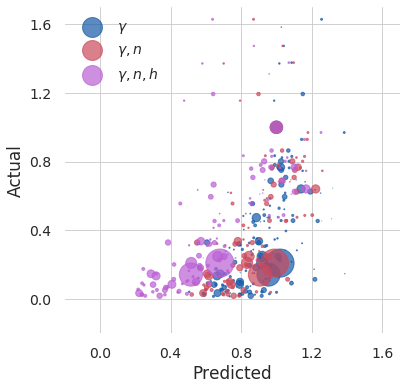

In [29]:
# var_names = ['rel_GDP_pred_inv','rel_GDP_pred_inv_emp','rel_GDP_pred_inv_emp_hc']
# var_name = var_names[0]
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df_fundamentals['rel_GDP_pred_inv'],df_fundamentals['rel_GDP'],
          sizes=df_fundamentals['emp'].values,color=colors[0],alpha=.7,label='$\gamma$')
ax.scatter(df_fundamentals['rel_GDP_pred_inv_emp'],df_fundamentals['rel_GDP'],
          sizes=df_fundamentals['emp'].values,color=colors[1],alpha=.7,label='$\gamma,n$')
ax.scatter(df_fundamentals['rel_GDP_pred_inv_emp_hc'],df_fundamentals['rel_GDP'],
          sizes=df_fundamentals['emp'].values,color=colors[2],alpha=.7,label='$\gamma,n,h$')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ticks = [0,.4,.8,1.2,1.6]
ax.set_xlim(-0.2,1.7)
ax.set_ylim(-0.2,1.7)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


ax.legend(loc='upper left',frameon=False)
plt.savefig('./rel_GDP_pred_inv_emp_hc.svg',bbox_inches='tight')

In [8]:
print(df_legend['rgdpna'])
print(df_legend['rnna'])
print(df_legend['pop'])

Real GDP at constant 2011 national prices (in mil. 2011US$)
Capital stock at constant 2011 national prices (in mil. 2011US$)
Population (in millions)


In [9]:
countries = ['KOR','CHN','TWN']

In [10]:
country_colors = dict(zip(countries,colors))

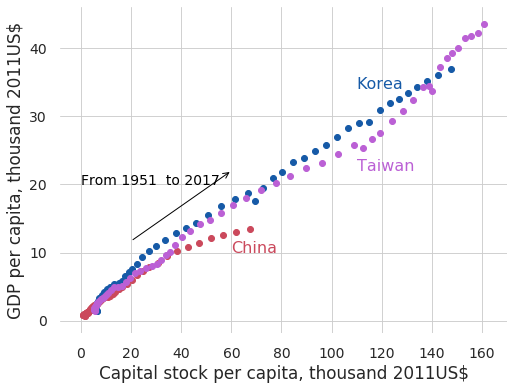

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
for country in countries:
    data = df[df.countrycode==country].copy()
    data.dropna(subset=['gdpPercap','capPercap'],inplace=True)
    ax.scatter(data['capPercap'],data['gdpPercap'],color=country_colors[country],label=country)
ax.set_ylabel('GDP per capita, thousand 2011US$')
ax.set_xlabel('Capital stock per capita, thousand 2011US$')
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#ax.legend(loc='best',frameon=False)
ax.annotate('China',(60,10),color=country_colors['CHN'],fontsize=16);
ax.annotate('Taiwan',(110,22),color=country_colors['TWN'],fontsize=16);
ax.annotate('Korea',(110,34),color=country_colors['KOR'],fontsize=16);
ax.annotate(
    "", xy=(60, 22), xycoords="data",
    xytext=(-100, -70), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k')
)
ax.annotate("From 1951  to 2017",(0,20),color='k',fontsize=14);
plt.savefig('./gdp-cap-time.svg',bbox_inches='tight')

In [12]:
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,gdpPercap,capPercap
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = df[df.year==2017][['gdpPercap','capPercap','country','countrycode','pop']]

In [14]:
data.dropna(inplace=True)

In [15]:
data

,gdpPercap,capPercap,country,countrycode,pop
67,35.344075,322.199272,Aruba,ABW,0.105264
135,6.787978,31.747052,Angola,AGO,29.784193
203,18.147874,243.320249,Anguilla,AIA,0.014909
271,11.438934,58.527723,Albania,ALB,2.930187
339,77.349655,285.539624,United Arab Emirates,ARE,9.400145
407,16.432255,48.232370,Argentina,ARG,44.271042
475,11.429484,18.096446,Armenia,ARM,2.930450
543,20.470248,131.533065,Antigua and Barbuda,ATG,0.102012
611,49.720249,163.145783,Australia,AUS,24.450562
679,43.571819,213.798423,Austria,AUT,8.735453


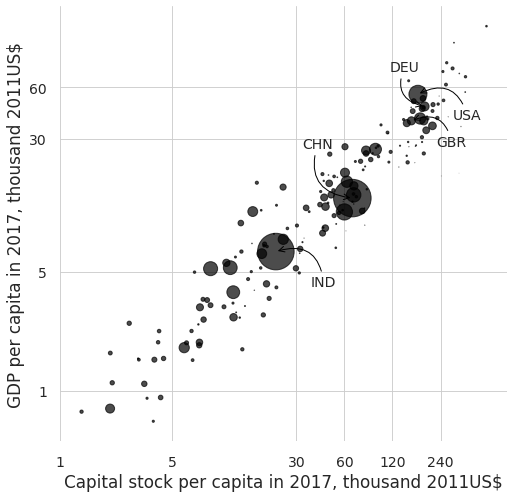

In [16]:
yticks = np.array([1,5,30,60],dtype=int)
xticks = np.array([1,5,30,60,120,240],dtype=int)
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data.capPercap,data.gdpPercap,color='k',sizes=data['pop'],alpha=.7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks(yticks)
ax.set_yticklabels((yticks))
ax.set_xticks(xticks)
ax.set_xticklabels((xticks))
ax.set_ylabel('GDP per capita in 2017, thousand 2011US$')
ax.set_xlabel('Capital stock per capita in 2017, thousand 2011US$')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
usa_ = data[data.countrycode=='USA'][['capPercap','gdpPercap']].values[0]
gbr_ = data[data.countrycode=='GBR'][['capPercap','gdpPercap']].values[0]
chn_ = data[data.countrycode=='CHN'][['capPercap','gdpPercap']].values[0]
ind_ = data[data.countrycode=='IND'][['capPercap','gdpPercap']].values[0]
deu_ = data[data.countrycode=='DEU'][['capPercap','gdpPercap']].values[0]

ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(35, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(-35, 35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(-50, 50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('./gdp-cap-cross-label.svg',bbox_inches='tight')

In [17]:
import plotly_express as px
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [30]:
data = df[df.year>=1960][['gdpPercap','capPercap','country','countrycode','pop','year']]

In [24]:
data[['gdpPercap','capPercap','pop']]=data[['gdpPercap','capPercap','pop']].round(decimals=1)

In [33]:
data = data.dropna()

In [35]:
data.head()

,gdpPercap,capPercap,country,countrycode,pop,year
20,5.828663,23.305373,Aruba,ABW,0.059063,1970
21,6.318071,25.813135,Aruba,ABW,0.059440,1971
22,6.846216,28.506392,Aruba,ABW,0.059840,1972
23,7.418473,31.409231,Aruba,ABW,0.060243,1973
24,8.054594,34.608056,Aruba,ABW,0.060528,1974


In [42]:
data.sort_values(['year'],inplace=True)

/home/ilhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
fig = px.scatter(data, x='capPercap', y='gdpPercap',size='pop',animation_frame='year',
                 animation_group='country',range_x=(0.1,250),range_y=(0.1,70),
           labels={'capPercap':'Capital stock per capita',
                  'gdpPercap':'GDP per capita',
                  'pop':'Population'},hover_name='country',color_discrete_sequence=['rgb(0,0,0)']*len(data),
          width=450,height=450,log_x=True,log_y=True,
          template='plotly_white')
py.offline.plot(fig, filename='gdp-cap-cross.html')

'gdp-cap-cross.html'

In [12]:
alpha = 1/3
delta = .05
n = 0.01
gamma = .2
f = lambda k: k**alpha
fdot = lambda k: gamma*k**alpha-(delta+n)*k
klist = [6.2]

In [13]:
for t in range(100):
    k_prime = klist[t]+fdot(klist[t])
    klist.append(k_prime)

In [14]:
klist[:3]

[6.2, 6.195418110002846, 6.191020601994977]

In [15]:
ylist = np.array(klist)**alpha

In [16]:
ylist[:3]

array([1.83709055, 1.83663789, 1.83620324])

Text(0.5, 1.0, 'Output per worker, $y$')

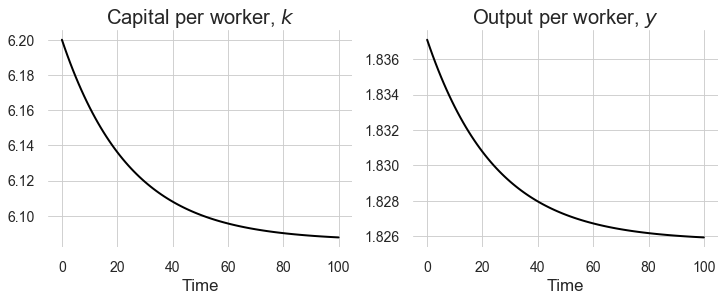

In [17]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.arange(len(klist)),klist,'k',linewidth=2)
ax[1].plot(np.arange(len(klist)),ylist,'k',linewidth=2)
for i in range(2):
    ax[i].set_xlabel('Time')
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
ax[0].set_title('Capital per worker, $k$')
ax[1].set_title('Output per worker, $y$')
#plt.savefig('./capital-output-simul.svg',bbox_inches='tight')